<a href="https://www.kaggle.com/code/alawdisoft/age-gender-detection-canny-img-30-50?scriptVersionId=139829594" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Age & Gender Detection

![](https://uploads-ssl.webflow.com/624ac40503a527cf47af4192/6355c0ceafc1667a2a07c36d_Age%20_%20Gender%20Detection_%20Top%20Use%20Cases.png)

In [1]:
import os
import cv2 as cv 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import warnings 
from tqdm.notebook import tqdm 
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm
from PIL import Image
import numpy as np
import cv2 as cv


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
# Example usage
path = "/kaggle/input/utkface-new/UTKFace"

new_width = 224
new_height = 224
new_shape = (224, 224,3)

files = os.listdir(path)

In [3]:
images=[]
ages=[]
gender=[]
for file in files:
    images.append(file)
    imgname = file.split("_")
    ages.append(int(imgname[0]))
    gender.append(int(imgname[1]))

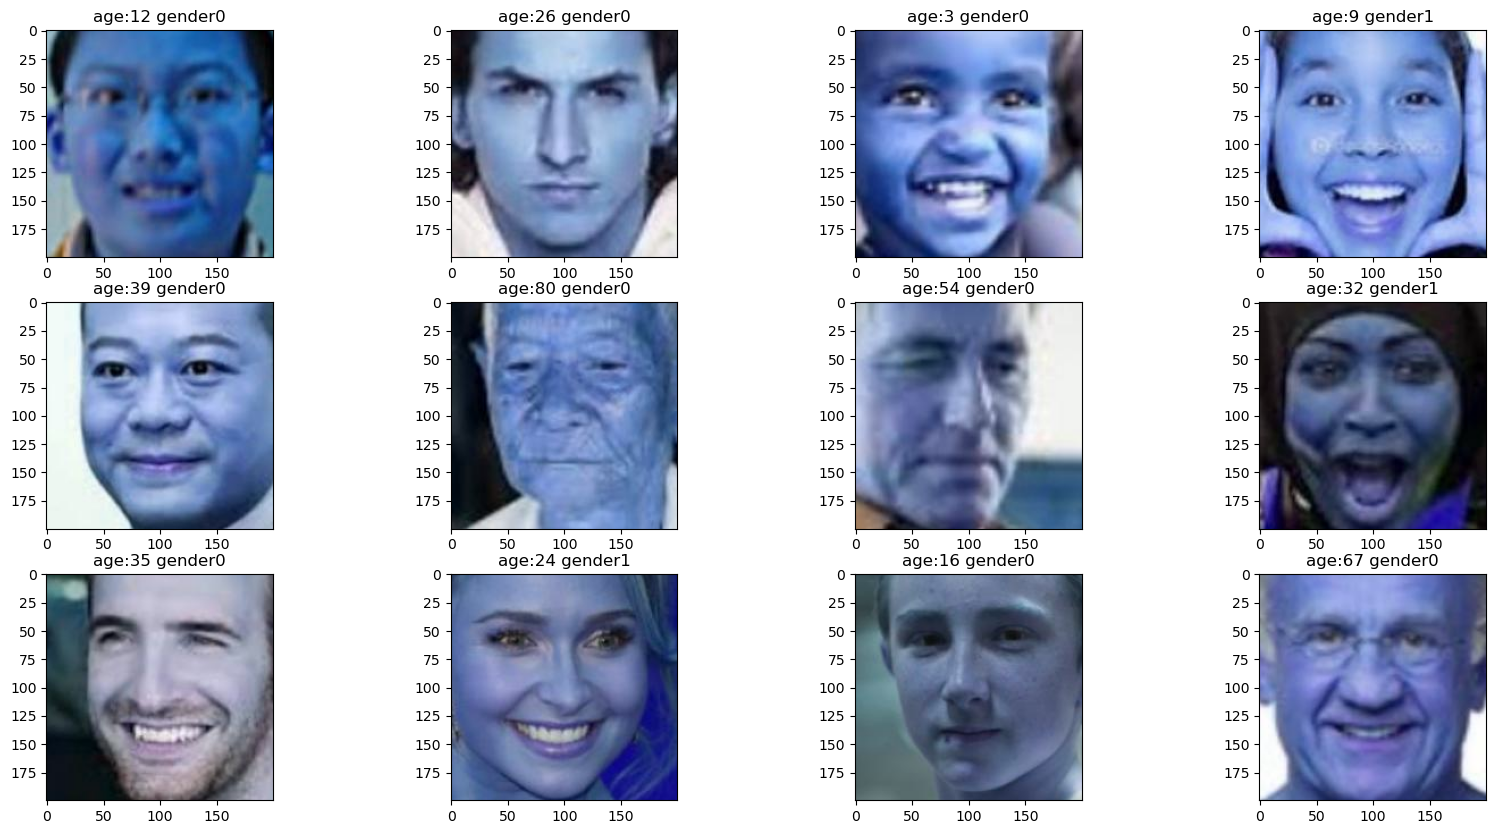

In [4]:
import random

duplicated = []
exam_images = []
total_files = len(files)  # Replace 'files' with your list of file names or paths
max_images = 36

while len(duplicated) < max_images:
    i = random.randint(0, total_files - 1)
    x = files[i].split("_")[-1]
    if x not in duplicated:
        duplicated.append(x)
        exam_images.append(files[i])
        
        
fig , ax = plt.subplots(figsize=(20 , 10 ) )
for i in range(12):
    plt.subplot(3 , 4 , i+1) 
    img = cv.imread(path+"/"+exam_images[i])
    plt.imshow(img)
    t = exam_images[i].split("_")
    plt.title(f"age:{t[0]} gender{t[1]}")


plt.show()

In [5]:
df = pd.DataFrame({"images": images , "ages":ages , "gender":gender } )
df.head() 

,images,ages,gender
0,26_0_2_20170104023102422.jpg.chip.jpg,26,0
1,22_1_1_20170112233644761.jpg.chip.jpg,22,1
2,21_1_3_20170105003215901.jpg.chip.jpg,21,1
3,28_0_0_20170117180555824.jpg.chip.jpg,28,0
4,17_1_4_20170103222931966.jpg.chip.jpg,17,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  23708 non-null  object
 1   ages    23708 non-null  int64 
 2   gender  23708 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 555.8+ KB


In [7]:
df.describe()

,ages,gender
count,23708.000000,23708.000000
mean,33.303484,0.477349
std,19.886112,0.499497
min,1.000000,0.000000
25%,23.000000,0.000000
50%,29.000000,0.000000
75%,45.000000,1.000000
max,116.000000,1.000000


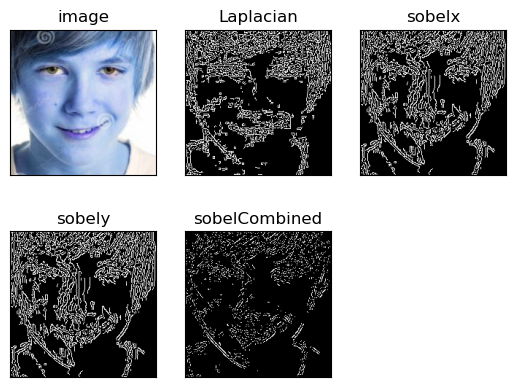

In [8]:
img  = cv.imread("/kaggle/input/utkface-new/UTKFace/10_0_0_20170110215927291.jpg.chip.jpg" )
# img = cv.cvtColor(img , cv.COLOR_BGR2RGB ) 

lap= cv.Laplacian(img , cv.CV_64F , ksize= 3)
lap=np.uint8(np.absolute(lap))

sobelx = cv.Sobel(img , cv.CV_64F , 1 , 0 )
sobely = cv.Sobel(img , cv.CV_64F , 0 , 1)

# Apply Canny edge detection on the Sobel outputs
sobelx = cv.Canny(np.uint8(np.absolute(sobelx)), 100, 200)
sobely = cv.Canny(np.uint8(np.absolute(sobely)), 100, 200)
lap = cv.Canny(lap , 100 , 200)

sobelCombined = cv.bitwise_and(sobelx , sobely)
titles = ['image', 'Laplacian', 'sobelx', 'sobely', 'sobelCombined']

images = [img, lap, sobelx, sobelx, sobelCombined]

for i in range(5):

    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')      

    plt.title(titles[i])      

    plt.xticks([]),plt.yticks([])#ticks
    
# plt.imshow( lab , 'gray')
plt.show()

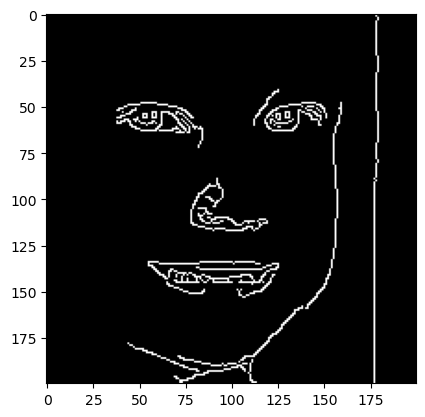

In [9]:

img  = cv.imread("/kaggle/input/utkface-new/UTKFace/10_0_0_20170103200522151.jpg.chip.jpg" )
imagry = cv.cvtColor(img , cv.COLOR_BGR2GRAY)
# ret, thresh = cv.threshold(img , 127 , 255 , 0 )
# countours , hierachy = cv.findContours(thresh , cv.RETR_TREE , cv.CHAIN_APPROX_NONE)
# print("Number of contours = " + str(len(contours)))

# print(contours[0])


# img = cv.cvtColor(img , cv.COLOR_BGR2RGB ) 
image = cv.bilateralFilter(imagry  , 11 , 17 , 17 )
lab= cv.Canny(image , 30   , 200 )

plt.imshow( lab , 'gray')
plt.show()

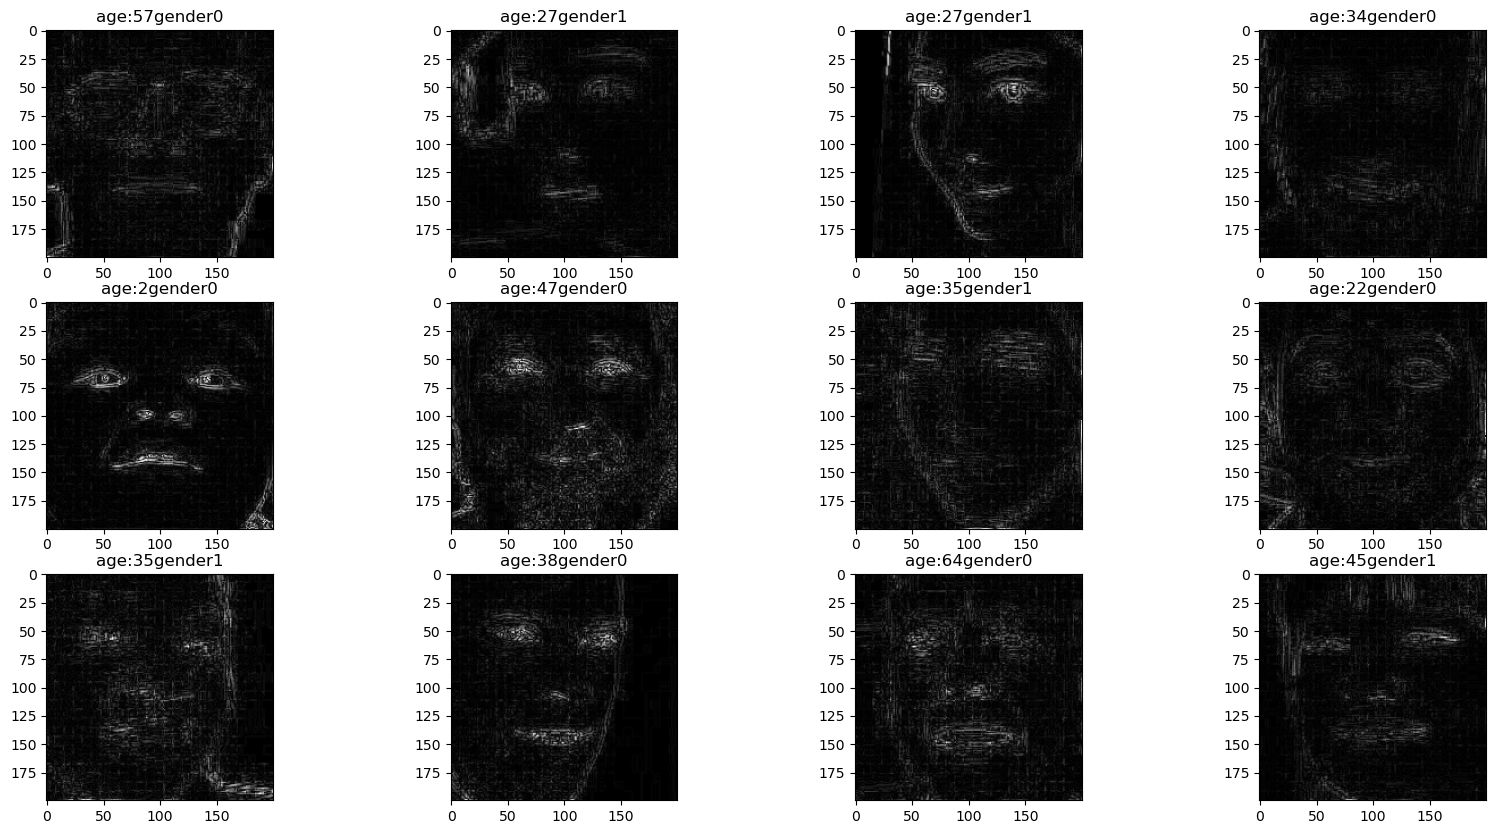

In [10]:
import random

duplicated = []
exam_images = []
total_files = len(files)  # Replace 'files' with your list of file names or paths
max_images = 36

while len(duplicated) < max_images:
    i = random.randint(0, total_files - 1)
    x = files[i].split("_")[-1]
    if x not in duplicated:
        duplicated.append(x)
        exam_images.append(files[i])
        
        
fig , ax = plt.subplots(figsize=(20 , 10 ) )
for i in range(12):
    plt.subplot(3 , 4 , i+1) 
    img = cv.imread(path+"/"+exam_images[i], 0)
    lab= cv.Laplacian(img , cv.CV_64F , ksize= 3)
    lab= np.uint8(np.absolute(lab))
    plt.imshow(lab , 'gray')
    t = exam_images[i].split("_")
    plt.title(f"age:{t[0]}gender{t[1]}")


plt.show()

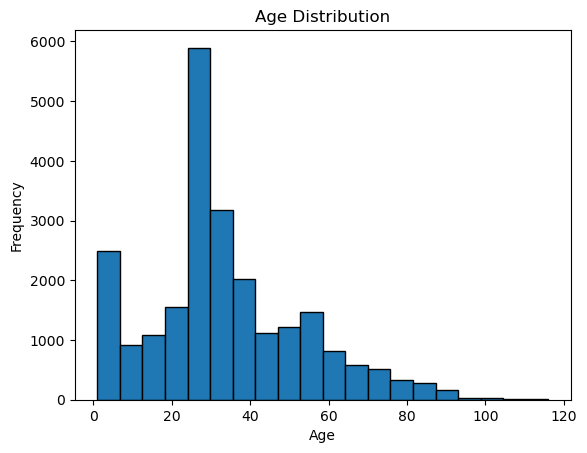

In [11]:
# Plot the age distribution
plt.hist(ages, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [12]:
mapping = {0 : "male" , 1:"female"}
# df['gender'] = df['gender'].map(mapping)

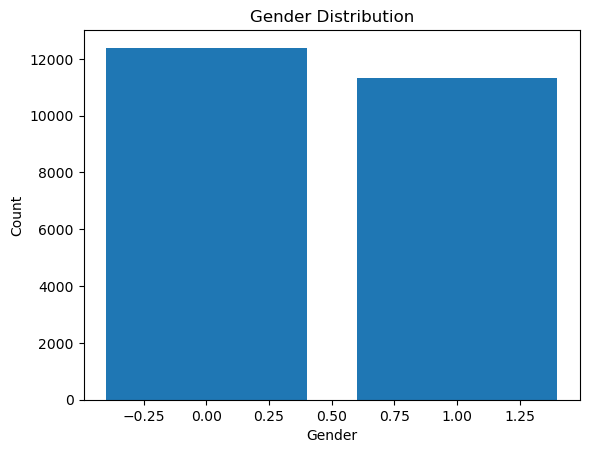

In [13]:
# Count the frequency of each gender
unique_genders, gender_counts = np.unique(df['gender'] , return_counts=True)

# Plot the gender distribution
plt.bar(unique_genders, gender_counts)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

<Axes: xlabel='ages', ylabel='Count'>

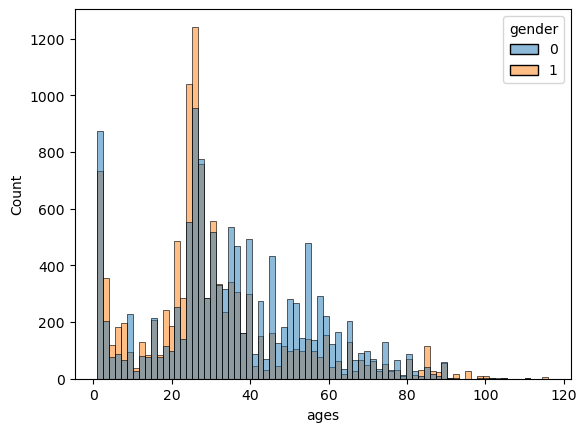

In [14]:
sns.histplot(x='ages' , hue='gender' , data=df)

In [15]:
from sklearn.model_selection import train_test_split
# X_train , x_test , y_train , y_test  =train_test_split(df['images'] , df[['ages' , 'gender']] , test_size=0.2 , random_state=42)

In [16]:
# print(f"X_train shape: {X_train.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"X_test shape: {x_test.shape}")
# print(f"y_test shape: {y_test.shape}")

In [17]:
# y_train['ages']

In [18]:
def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = load_img(path+"/"+ image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)

#         lab = cv.Laplacian(img, cv.CV_64F, ksize=3)
#         lab = np.uint8(np.absolute(lab))
#         canny = cv.Canny(img , 100 , 200 )
#         sobely = cv.Sobel(img , cv.CV_64F , 0 , 1)

#         sobelx = np.uint8(np.absolute(sobelx))
#         sobely = np.uint8(np.absolute(sobely))
        lab= cv.Canny(img , 30     , 50 )
#         lab= cv.Laplacian(img , cv.CV_64F , ksize= 3)
#         lab= np.uint8(np.absolute(lab))
        features.append(lab)

    features = np.array(features)
    features = features.reshape(len(features), 128 , 128  , 1)
    return features



X = extract_image_features(df['images'])


100%|██████████| 23708/23708 [03:56<00:00, 100.39it/s]


In [19]:
# X = X / 255

* The year at which a person's face changes can vary greatly depending on various factors such as genetics, lifestyle, overall health, and individual differences. It is challenging to pinpoint an exact year or age when facial changes occur, as it is a gradual and continuous process throughout one's life.

However, there are certain age ranges during which significant facial changes are commonly observed. Here is a general overview of how facial features may change over time:

1- Childhood: During childhood, the face undergoes substantial growth and development. The facial features are typically more rounded, and the proportions of the face continue to change.

2- Adolescence: In the teenage years, the face goes through significant changes due to hormonal changes, growth spurts, and the onset of puberty. Features may become more defined, and facial structures continue to develop.

3- Young adulthood: In the 20s and 30s, the face generally maintains its youthful appearance. However, subtle changes may start to occur, such as the appearance of fine lines, slight loss of collagen, and changes in skin elasticity.

4- Middle adulthood: In the 40s and 50s, the signs of aging become more noticeable. Wrinkles, age spots, and loss of volume in certain areas of the face, such as cheeks and lips, may become more apparent. Skin may also show signs of sagging and decreased elasticity.

5- Older adulthood: As individuals progress into their 60s and beyond, further changes in the face occur. These may include deeper wrinkles, more pronounced sagging of facial tissues, thinning of the skin, and changes in facial bone structure.

In [20]:
df['ages'] = ages
df['ages']

0        26
1        22
2        21
3        28
4        17
         ..
23703    41
23704    42
23705     2
23706    65
23707    66
Name: ages, Length: 23708, dtype: int64

In [21]:
import pandas as pd

# Define the age categories
bins = [0, 18, 30, 50, float('inf')]
labels = ['<18', '18-30', '30-50', '50+']

# Create a new column with the age categories
df['ages'] = pd.cut(df['ages'], bins=bins, labels=labels, right=False)


In [22]:
mapping = {'<18':0 , '18-30':1, '30-50':2 , '50+':3}
df['ages'] = df['ages'].map(mapping)

In [23]:
df['ages'].value_counts()

1    7704
2    6782
3    4989
0    4233
Name: ages, dtype: int64

In [24]:
y_gender = np.array(df['gender'])
y_age = np.array(df['ages'])

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Rescaling


# Define the Sequential model
model = Sequential()

# Preprocessing layer: rescale pixel values between 0 and 1
model.add(Rescaling(1./255, input_shape=(128 , 128  ,1)))

# Convolutional layers
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Flatten the feature maps
model.add(Flatten())

# Dense (fully connected) layers
model.add(Dense(128, activation='relu'))

# Separate output layers for gender and age predictions
output_1 = Dense(1, activation='sigmoid', name='gender_out')(model.output)
output_2 = Dense(1, activation='relu', name='age_out')(model.output)

# Define the model with multiple outputs
model = Model(inputs=model.input, outputs=[output_1, output_2])

# Print model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 rescaling_input (InputLayer)   [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 128, 128, 1)  0           ['rescaling_input[0][0]']        
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  160         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

In [26]:
model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam', metrics=['accuracy'])

In [27]:

history = model.fit(x=X, y=[y_gender, y_age],
                    batch_size=32, epochs=1000, validation_split=0.2)



Epoch 1/1000


2023-08-13 22:03:47.300459: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


593/593 [==============================] - 25s 14ms/step - loss: 1.1769 - gender_out_loss: 0.5142 - age_out_loss: 0.6628 - gender_out_accuracy: 0.7410 - age_out_accuracy: 0.3799 - val_loss: 0.9558 - val_gender_out_loss: 0.4125 - val_age_out_loss: 0.5434 - val_gender_out_accuracy: 0.8039 - val_age_out_accuracy: 0.3937
Epoch 2/1000
593/593 [==============================] - 7s 12ms/step - loss: 0.9272 - gender_out_loss: 0.3795 - age_out_loss: 0.5477 - gender_out_accuracy: 0.8266 - age_out_accuracy: 0.4131 - val_loss: 0.8426 - val_gender_out_loss: 0.3401 - val_age_out_loss: 0.5026 - val_gender_out_accuracy: 0.8484 - val_age_out_accuracy: 0.4083
Epoch 3/1000
593/593 [==============================] - 7s 13ms/step - loss: 0.8264 - gender_out_loss: 0.3168 - age_out_loss: 0.5095 - gender_out_accuracy: 0.8571 - age_out_accuracy: 0.4231 - val_loss: 0.8039 - val_gender_out_loss: 0.3141 - val_age_out_loss: 0.4898 - val_gender_out_accuracy: 0.8600 - val_age_out_accuracy: 0.4209
Epoch 4/1000
593/59

In [28]:

history = model.fit(x=X, y=[y_gender, y_age],
                    batch_size=32, epochs=50, validation_split=0.2)



Epoch 1/50
593/593 [==============================] - 8s 13ms/step - loss: 0.1365 - gender_out_loss: 0.0092 - age_out_loss: 0.1273 - gender_out_accuracy: 0.9958 - age_out_accuracy: 0.4988 - val_loss: 1.2838 - val_gender_out_loss: 0.8559 - val_age_out_loss: 0.4280 - val_gender_out_accuracy: 0.8600 - val_age_out_accuracy: 0.4310
Epoch 2/50
593/593 [==============================] - 7s 13ms/step - loss: 0.1360 - gender_out_loss: 0.0094 - age_out_loss: 0.1266 - gender_out_accuracy: 0.9960 - age_out_accuracy: 0.4999 - val_loss: 1.2538 - val_gender_out_loss: 0.8307 - val_age_out_loss: 0.4232 - val_gender_out_accuracy: 0.8640 - val_age_out_accuracy: 0.4348
Epoch 3/50
593/593 [==============================] - 7s 12ms/step - loss: 0.1350 - gender_out_loss: 0.0093 - age_out_loss: 0.1257 - gender_out_accuracy: 0.9961 - age_out_accuracy: 0.4994 - val_loss: 1.2556 - val_gender_out_loss: 0.8203 - val_age_out_loss: 0.4353 - val_gender_out_accuracy: 0.8564 - val_age_out_accuracy: 0.4270
Epoch 4/50
59

In [29]:

history = model.fit(x=X, y=[y_gender, y_age],
                    batch_size=32, epochs=50, validation_split=0.2)



Epoch 1/50
593/593 [==============================] - 8s 13ms/step - loss: 0.1382 - gender_out_loss: 0.0117 - age_out_loss: 0.1264 - gender_out_accuracy: 0.9955 - age_out_accuracy: 0.5002 - val_loss: 1.2569 - val_gender_out_loss: 0.8332 - val_age_out_loss: 0.4238 - val_gender_out_accuracy: 0.8633 - val_age_out_accuracy: 0.4329
Epoch 2/50
593/593 [==============================] - 7s 12ms/step - loss: 0.1366 - gender_out_loss: 0.0100 - age_out_loss: 0.1266 - gender_out_accuracy: 0.9959 - age_out_accuracy: 0.5002 - val_loss: 1.2615 - val_gender_out_loss: 0.8307 - val_age_out_loss: 0.4308 - val_gender_out_accuracy: 0.8623 - val_age_out_accuracy: 0.4353
Epoch 3/50
593/593 [==============================] - 7s 12ms/step - loss: 0.1391 - gender_out_loss: 0.0111 - age_out_loss: 0.1280 - gender_out_accuracy: 0.9955 - age_out_accuracy: 0.4995 - val_loss: 1.2921 - val_gender_out_loss: 0.8664 - val_age_out_loss: 0.4257 - val_gender_out_accuracy: 0.8619 - val_age_out_accuracy: 0.4346
Epoch 4/50
59

In [30]:

history = model.fit(x=X, y=[y_gender, y_age],
                    batch_size=32, epochs=1000 , validation_split=0.2)


Epoch 1/1000
593/593 [==============================] - 8s 13ms/step - loss: 0.1358 - gender_out_loss: 0.0103 - age_out_loss: 0.1255 - gender_out_accuracy: 0.9953 - age_out_accuracy: 0.4991 - val_loss: 1.3133 - val_gender_out_loss: 0.8827 - val_age_out_loss: 0.4306 - val_gender_out_accuracy: 0.8606 - val_age_out_accuracy: 0.4340
Epoch 2/1000
593/593 [==============================] - 8s 13ms/step - loss: 0.1384 - gender_out_loss: 0.0097 - age_out_loss: 0.1287 - gender_out_accuracy: 0.9959 - age_out_accuracy: 0.4996 - val_loss: 1.2447 - val_gender_out_loss: 0.8081 - val_age_out_loss: 0.4366 - val_gender_out_accuracy: 0.8623 - val_age_out_accuracy: 0.4355
Epoch 3/1000
593/593 [==============================] - 7s 13ms/step - loss: 0.1336 - gender_out_loss: 0.0086 - age_out_loss: 0.1250 - gender_out_accuracy: 0.9964 - age_out_accuracy: 0.5004 - val_loss: 1.2990 - val_gender_out_loss: 0.8670 - val_age_out_loss: 0.4320 - val_gender_out_accuracy: 0.8636 - val_age_out_accuracy: 0.4332
Epoch 4